In [58]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Assigning the file name to a variable
file1 = 'covid_19_india.csv'

In [60]:
#Reading the csv file
df = pd.read_csv(file1)
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [61]:
#Shape of the data frame df
df.shape

(14978, 9)

In [62]:
#List of columns in the data frame df
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [63]:
sorted(df['State/UnionTerritory'].unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [64]:
#Saving df as a check point
checkpoint1 = df.copy()

In [65]:
#Renaming the State/UnionTerritory column to State
df2 = df.rename(columns = {'State/UnionTerritory':'State'})
df2

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [66]:
#Shape of df2
df2.shape

(14978, 9)

In [67]:
#Selecting rows with a particular value and assigning the dataframe to df_temp and printing the shape and head
df_temp = df2[(df2['State'] == 'Cases being reassigned to states') | (df2['State']=='Unassigned')]
print(df_temp.shape)
df_temp.head()

(63, 9)


,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
500,501,2020-03-30,9:30 PM,Unassigned,-,-,0,0,46
528,529,2020-03-31,8:30 PM,Unassigned,-,-,0,0,38
617,618,2020-04-03,6:00 PM,Unassigned,-,-,0,0,77
2133,2134,2020-05-20,8:00 AM,Cases being reassigned to states,-,-,0,0,1096
2167,2168,2020-05-21,8:00 AM,Cases being reassigned to states,-,-,0,0,1403


In [68]:
#Copying df2 to a new dataframe df_india to avoid modifying the original data frame
df_india = df2.copy() 

#Replacing the values in df_india
df_india['State'] = df2['State'].replace({'Cases being reassigned to states':'India','Unassigned':'India'})

sorted(df_india['State'].unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'India',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [69]:
#grouping the dataset by state and assigning it to grouped_df_india
grouped_df_india = df_india.groupby('State')

#only numeric columns will be present in grouped data frame
summed_by_state = grouped_df_india.sum(numeric_only=True)

#resetting the index
summed_by_state = summed_by_state.reset_index()

#dropping Sno column
summed_by_state.drop('Sno',axis = 1,inplace=True)

#sort the data frame according to Confirmed column
summed_by_state.sort_values(by = 'Confirmed', inplace = True, ascending = False)
summed_by_state

,State,Cured,Deaths,Confirmed
22,Maharashtra,526633643,13820836,605322415
17,Karnataka,221317876,3207537,248744115
1,Andhra Pradesh,218737272,1875890,233028957
32,Tamil Nadu,212155695,3312284,227603573
18,Kerala,182786599,785182,206420276
36,Uttar Pradesh,147420316,2249693,164896195
9,Delhi,151743067,2802988,162786816
38,West Bengal,125919387,2369125,136705312
27,Odisha,79034390,432799,84153166
30,Rajasthan,71021740,719139,80229204


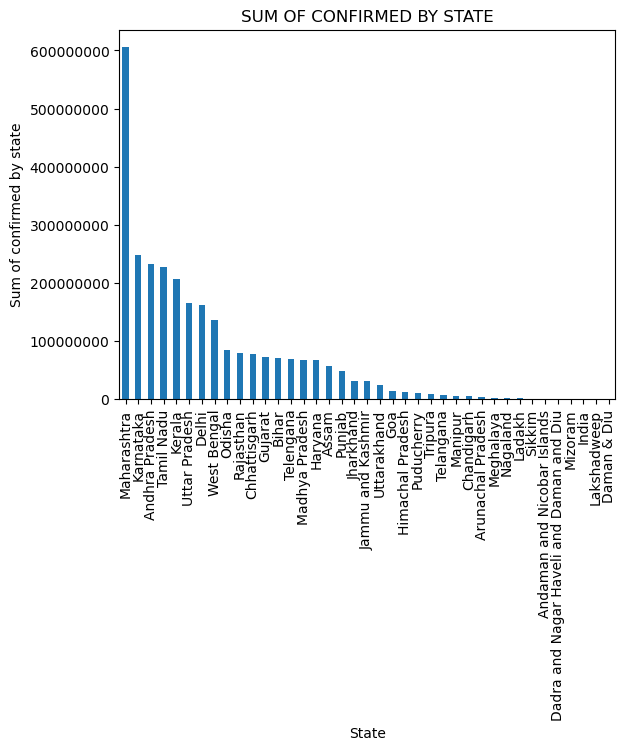

In [70]:
#Plotting the sum of confirmed by state
summed_by_state = summed_by_state.sort_values(by = 'Confirmed', ascending = False)
summed_by_state.plot.bar(y = 'Confirmed',x = 'State',legend = False)
plt.ticklabel_format(style = 'plain',axis = 'y')
# fig, ax = plt.subplots(figsize=(180,200))
plt.ylabel("Sum of confirmed by state")
plt.xlabel('State')
plt.title("SUM OF CONFIRMED BY STATE")

plt.show()

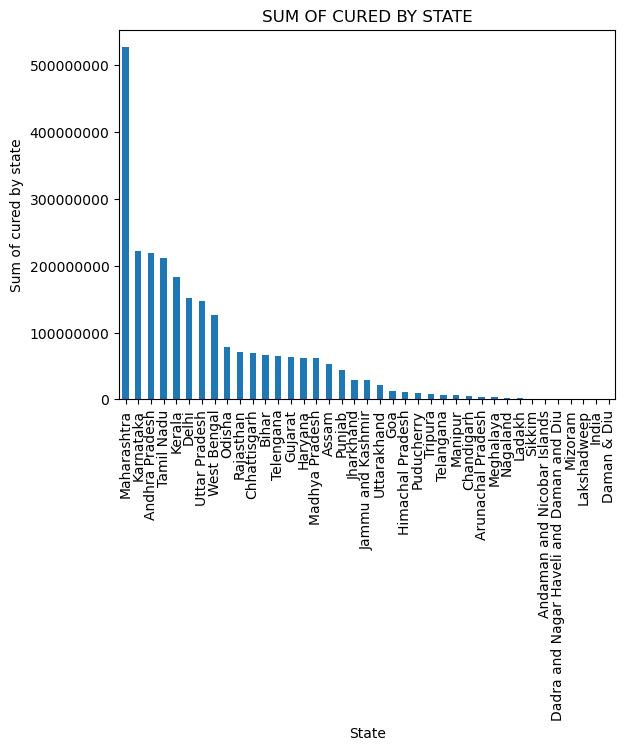

In [71]:
#Plotting the sum of cured by state
summed_by_state = summed_by_state.sort_values(by = 'Cured', ascending = False)
summed_by_state.plot.bar(y = 'Cured',x = 'State',legend = False)
plt.ticklabel_format(style = 'plain',axis = 'y')
# fig, ax = plt.subplots(figsize=(180,200))
plt.ylabel("Sum of cured by state")
plt.xlabel('State')
plt.title("SUM OF CURED BY STATE")

plt.show()

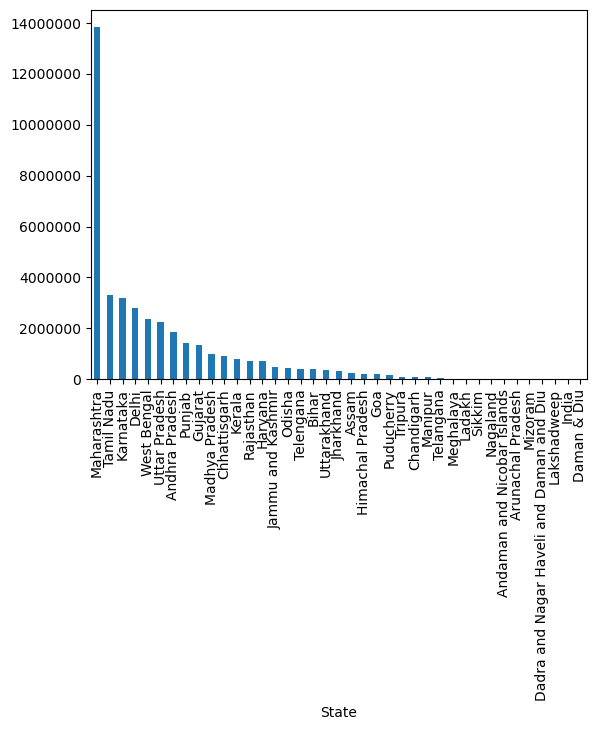

In [72]:
#Plotting the sum of deaths by state
summed_by_state = summed_by_state.sort_values(by = 'Deaths', ascending = False)
summed_by_state.plot.bar(y = 'Deaths',x = 'State',legend = False)
plt.ticklabel_format(style = 'plain',axis = 'y')
fig, ax = plt.subplots(figsize=(180,200))
plt.ylabel("Sum of deaths by state")
plt.xlabel('State')
plt.title("SUM OF DEATHS BY STATE")

plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
df_india_scaled = df_india.copy()

In [76]:
df_india_scaled['Cured_Scaled'] = scaler.fit_transform(df_india[['Cured']])
df_india_scaled['Deaths_Scaled'] = scaler.fit_transform(df_india[['Deaths']])
df_india_scaled['Confirmed_Scaled'] = scaler.fit_transform(df_india[['Confirmed']])
df_india_scaled

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Cured_Scaled,Deaths_Scaled,Confirmed_Scaled
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,-0.481868,-0.378445,-0.477121
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,-0.481868,-0.378445,-0.477121
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,-0.481868,-0.378445,-0.477119
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,-0.481868,-0.378445,-0.477116
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,-0.481868,-0.378445,-0.477116
...,...,...,...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007,0.834144,0.034271,0.836909
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816,-0.382195,-0.317693,-0.374966
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239,0.075439,0.273189,0.231791
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140,3.486478,2.051333,3.550369


In [77]:
df_india_scaled.to_excel('OUTPUT DATAFRAME EXCEL SHEETS/df_india_scaled.xlsx')

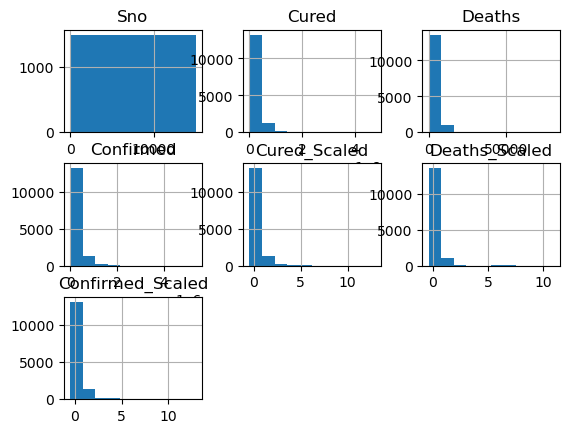

In [21]:
df_india_scaled.hist()
plt.xlabel('Cured')
plt.ylabel('Frequency')
plt.title('Histogram of Cured column')
plt.show()

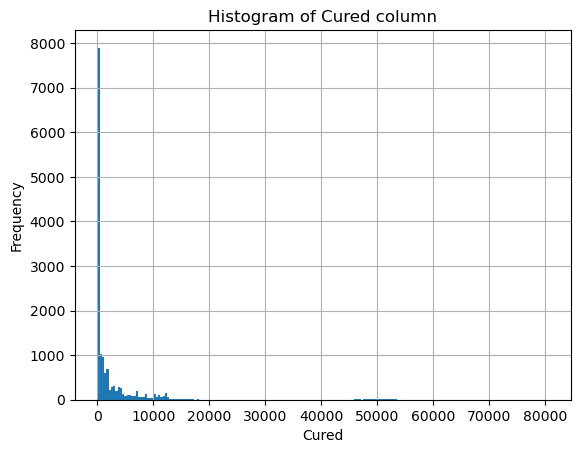

In [22]:
df_india_scaled['Deaths'].hist(bins = 200)
plt.xlabel('Cured')
plt.ylabel('Frequency')
plt.title('Histogram of Cured column')

plt.show()

In [23]:
df_india

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [24]:
df_india.to_excel('OUTPUT DATAFRAME EXCEL SHEETS/df_india.xlsx',index = False)

In [45]:
print(f"List of unique values in ConfirmedIndianNational:\n{df_india['ConfirmedIndianNational'].unique()}\n")
print(f"List of unique values in ConfirmedForeignNational:{df_india['ConfirmedForeignNational'].unique()}")

List of unique values in ConfirmedIndianNational:
['1' '2' '3' '0' '6' '7' '8' '9' '4' '15' '5' '17' '10' '11' '19' '14'
 '22' '32' '12' '23' '24' '36' '25' '39' '44' '18' '16' '26' '49' '33'
 '60' '13' '28' '45' '64' '21' '29' '71' '30' '37' '87' '86' '41' '101'
 '125' '34' '35' '42' '55' '110' '20' '121' '40' '129' '127' '38' '168'
 '177' '52' '46' '54' '-']

List of unique values in ConfirmedForeignNational:['0' '1' '2' '14' '3' '9' '7' '11' '10' '8' '6' '-']


In [26]:
print(f"Data type of ConfirmedIndianNational: {df_india['ConfirmedIndianNational'].dtype}")
print(f"Data type of ConfirmedForeignNational: {df_india['ConfirmedForeignNational'].dtype}")

Data type of ConfirmedIndianNational: object
Data type of ConfirmedForeignNational: object


In [27]:
def convertToInt(value):
    try:
        return int(value)
    except ValueError:
            return value

In [29]:
df_india_null_filled = df_india.copy()

In [30]:
df_india_null_filled['ConfirmedIndianNational'] = df_india['ConfirmedIndianNational'].apply(convertToInt)
df_india_null_filled['ConfirmedForeignNational'] = df_india['ConfirmedForeignNational'].apply(convertToInt)

In [31]:
print(f"Data type of ConfirmedIndianNational: {df_india_null_filled['ConfirmedIndianNational'].dtype}")
print(f"Data type of ConfirmedForeignNational: {df_india_null_filled['ConfirmedForeignNational'].dtype}")

Data type of ConfirmedIndianNational: object
Data type of ConfirmedForeignNational: object


In [32]:
print(f"List of unique values in ConfirmedIndianNational:{df_india_null_filled['ConfirmedIndianNational'].unique()}\n")
print(f"List of unique values in ConfirmedForeignNational:{df_india_null_filled['ConfirmedForeignNational'].unique()}")

List of unique values in ConfirmedIndianNational:[1 2 3 0 6 7 8 9 4 15 5 17 10 11 19 14 22 32 12 23 24 36 25 39 44 18 16 26
 49 33 60 13 28 45 64 21 29 71 30 37 87 86 41 101 125 34 35 42 55 110 20
 121 40 129 127 38 168 177 52 46 54 '-']

List of unique values in ConfirmedForeignNational:[0 1 2 14 3 9 7 11 10 8 6 '-']


In [33]:
df_india_null_filled['ConfirmedIndianNational'].unique()

array([1, 2, 3, 0, 6, 7, 8, 9, 4, 15, 5, 17, 10, 11, 19, 14, 22, 32, 12,
       23, 24, 36, 25, 39, 44, 18, 16, 26, 49, 33, 60, 13, 28, 45, 64, 21,
       29, 71, 30, 37, 87, 86, 41, 101, 125, 34, 35, 42, 55, 110, 20, 121,
       40, 129, 127, 38, 168, 177, 52, 46, 54, '-'], dtype=object)

In [34]:
len(df_india_null_filled['ConfirmedForeignNational'].unique())==len(df_india['ConfirmedForeignNational'].unique())

True

In [35]:
len(df_india_null_filled['ConfirmedIndianNational'].unique())==len(df_india['ConfirmedIndianNational'].unique())

True

In [36]:
df_india_null_filled

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [37]:
print(f"Mean of df_india_null_filled containing numbers: {int(df_india_null_filled[df_india_null_filled['ConfirmedIndianNational']!='-']['ConfirmedIndianNational'].mean())}")
print(f"Mean of df_india_null_filled containing numbers: {int(df_india_null_filled[df_india_null_filled['ConfirmedForeignNational']!='-']['ConfirmedForeignNational'].mean())}")

Mean of df_india_null_filled containing numbers: 12
Mean of df_india_null_filled containing numbers: 1


In [38]:
#grouping the dataset by state and assigning it to grouped_df_india
df_temp = df_india_null_filled[df_india_null_filled['ConfirmedIndianNational']!='-'].copy()
grouped_df_india_null_filled_state = df_temp.groupby('State')

#only numeric columns will be present in grouped data frame
grouped_df_india_null_filled_state_average = grouped_df_india_null_filled_state.mean(numeric_only=False)
grouped_df_india_null_filled_state_average

C:\Users\NILADRI\AppData\Local\Temp\ipykernel_6928\3557788250.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  grouped_df_india_null_filled_state_average = grouped_df_india_null_filled_state.mean(numeric_only=False)


,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
State,,,,,,
Andaman and Nicobar Islands,393.333333,2.666667,0.000000,0.000000,0.000000,2.666667
Andhra Pradesh,245.882353,4.764706,0.000000,0.235294,0.000000,4.764706
Bihar,344.571429,4.571429,0.000000,0.000000,1.000000,4.571429
Chandigarh,321.300000,5.000000,0.000000,0.000000,0.000000,5.000000
Chhattisgarh,311.300000,2.500000,0.000000,0.000000,0.000000,2.500000
Delhi,177.814815,13.037037,0.407407,2.296296,0.555556,13.444444
Goa,399.000000,3.000000,0.000000,0.000000,0.000000,3.000000
Gujarat,324.777778,28.444444,0.555556,0.000000,1.444444,29.000000
Haryana,190.320000,4.440000,10.640000,2.240000,0.000000,15.080000


In [39]:
df_temp

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
441,442,2020-03-28,6:00 PM,Tamil Nadu,34,6,2,1,40
442,443,2020-03-28,6:00 PM,Telengana,46,10,1,0,56
443,444,2020-03-28,6:00 PM,Uttarakhand,4,1,0,0,5
444,445,2020-03-28,6:00 PM,Uttar Pradesh,54,1,11,0,55


In [40]:
sorted(df_india_null_filled.State.unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'India',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [41]:
sorted(df_temp.State.unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Mizoram',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telengana',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [42]:
states = []
for i in sorted(df_india_null_filled.State.unique()):
    if i not in sorted(df_temp.State.unique()):
        print(i)
        states.append(i)

Arunachal Pradesh
Assam
Dadra and Nagar Haveli and Daman and Diu
Daman & Diu
India
Jharkhand
Lakshadweep
Meghalaya
Nagaland
Sikkim
Telangana
Tripura


In [43]:
df_india_null_filled[df_india_null_filled.State.isin(states)]

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
500,501,2020-03-30,9:30 PM,India,-,-,0,0,46
528,529,2020-03-31,8:30 PM,India,-,-,0,0,38
531,532,2020-04-01,7:30 PM,Assam,-,-,0,0,1
541,542,2020-04-01,7:30 PM,Jharkhand,-,-,0,0,1
560,561,2020-04-02,6:00 PM,Assam,-,-,0,0,5
...,...,...,...,...,...,...,...,...,...
14964,14965,2021-05-16,8:00 AM,Meghalaya,-,-,18124,301,22763
14966,14967,2021-05-16,8:00 AM,Nagaland,-,-,13654,196,17835
14971,14972,2021-05-16,8:00 AM,Sikkim,-,-,7857,203,11070
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007


In [44]:
df_india_null_filled[df_india_null_filled['ConfirmedIndianNational'] == '-']

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
446,447,2020-03-29,7:30 PM,Andhra Pradesh,-,-,1,0,19
447,448,2020-03-29,7:30 PM,Andaman and Nicobar Islands,-,-,0,0,9
448,449,2020-03-29,7:30 PM,Bihar,-,-,0,1,11
449,450,2020-03-29,7:30 PM,Chandigarh,-,-,0,0,8
450,451,2020-03-29,7:30 PM,Chhattisgarh,-,-,0,0,7
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [51]:
dict_states = dict([[grouped_df_india_null_filled_state_average.index,grouped_df_india_null_filled_state_average.ConfirmedIndianNational]])
dict_states

TypeError: unhashable type: 'Index'

In [49]:
grouped_df_india_null_filled_state_average.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telengana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='State')

In [53]:
df_india_null_filled

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14973,14974,2021-05-16,8:00 AM,Telangana,-,-,469007,2928,525007
14974,14975,2021-05-16,8:00 AM,Tripura,-,-,35522,431,40816
14975,14976,2021-05-16,8:00 AM,Uttarakhand,-,-,198616,4623,283239
14976,14977,2021-05-16,8:00 AM,Uttar Pradesh,-,-,1414259,17238,1609140


In [56]:
sorted(df_india_null_filled.State.unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'India',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telengana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [57]:
len(df_india_null_filled.State.unique())

39

In [78]:
df_india_null_filled.to_excel('OUTPUT DATAFRAME EXCEL SHEETS/df_india_null_filled.xlsx')